# Exploración de la conversación digital el día del Plebiscito por la Paz con datos de Twitter

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

## Exploración y Análisis Descriptivo

Como siempre, el primer paso es importar el conjunto de datos, con el fin de realizar trabajos de exploración y análisis descriptivo.

In [3]:
data = pd.read_json("plebiscito.json", lines = True)

Nos interesa saber qué variables o columnas se encuentran al interior del conjunto, que ya sabemos son 34 columnas relacionadas a un poco más de 35l tuits.

In [4]:
data.shape

(33766, 34)

In [5]:
data.columns

Index(['created_at', 'id', 'id_str', 'text', 'source', 'truncated',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'entities', 'favorited', 'retweeted', 'filter_level', 'lang',
       'timestamp_ms', 'retweeted_status', 'extended_entities',
       'possibly_sensitive', 'display_text_range', 'quoted_status_id',
       'quoted_status_id_str', 'quoted_status', 'extended_tweet', 'limit'],
      dtype='object')

In [6]:
data.head(10)

created_at            id        id_str  \
0 2016-10-02 16:21:03+00:00  7.826164e+17  7.826164e+17   
1 2016-10-02 16:21:05+00:00  7.826164e+17  7.826164e+17   
2 2016-10-02 16:21:05+00:00  7.826164e+17  7.826164e+17   
3 2016-10-02 16:21:06+00:00  7.826164e+17  7.826164e+17   
4 2016-10-02 16:21:06+00:00  7.826164e+17  7.826164e+17   
5 2016-10-02 16:21:07+00:00  7.826164e+17  7.826164e+17   
6 2016-10-02 16:21:08+00:00  7.826164e+17  7.826164e+17   
7 2016-10-02 16:21:08+00:00  7.826164e+17  7.826164e+17   
8 2016-10-02 16:21:08+00:00  7.826164e+17  7.826164e+17   
9 2016-10-02 16:21:09+00:00  7.826164e+17  7.826164e+17   

                                                text  \
0  #HappySunday  #FelizDomingo #DomingoDeGanarSeg...   
1  RT @juanitamolano: En París y en Bogotá #SiALa...   
2  Por una Colombia diferente. #VotoSiALaPaz #Vot...   
3  Me voy acercando a mi puesto de votación y sie...   
4  Hoy todos los que vamos por el SI, alegres, co...   
5  #HoyVotoSi\nPor un gran futuro para Colombia y...   
6  RT @repnicoguerrero: Juntos como siempre, en l...   
7  #VotoSiALaPaz #HoyVotoSi #VotacionesSeguras #S...   
8  RT @F_PS86: Yo si creo!! Por una paz con justi...   
9  #HoyVotoSi\n#VotoSíSinSerSantista https://t.co...   

                                              source  truncated  \
0  <a href="http://twitter.com/download/android" ...        0.0   
1  <a href="http://twitter.com/download/android" ...        0.0   
2  <a href="http://twitter.com/download/android" ...        0.0   
3  <a href="http://twitter.com/download/android" ...        0.0   
4  <a href="http://twitter.com" rel="nofollow">Tw...        0.0   
5  <a href="http://twitter.com/download/android" ...        0.0   
6  <a href="http://twitter.com/download/android" ...        0.0   
7  <a href="http://twitter.com/download/android" ...        0.0   
8  <a href="http://twitter.com/download/iphone" r...        0.0   
9  <a href="http://twitter.com" rel="nofollow">Tw...        0.0   

   in_reply_to_status_id  in_reply_to_status_id_str  in_reply_to_user_id  \
0                    NaN                        NaN                  NaN   
1                    NaN                        NaN                  NaN   
2                    NaN                        NaN                  NaN   
3                    NaN                        NaN                  NaN   
4                    NaN                        NaN                  NaN   
5                    NaN                        NaN                  NaN   
6                    NaN                        NaN                  NaN   
7                    NaN                        NaN                  NaN   
8                    NaN                        NaN                  NaN   
9                    NaN                        NaN                  NaN   

   in_reply_to_user_id_str  ...            timestamp_ms  \
0                      NaN  ... 2016-10-02 16:21:03.844   
1                      NaN  ... 2016-10-02 16:21:05.277   
2                      NaN  ... 2016-10-02 16:21:05.541   
3                      NaN  ... 2016-10-02 16:21:06.409   
4                      NaN  ... 2016-10-02 16:21:06.743   
5                      NaN  ... 2016-10-02 16:21:07.228   
6                      NaN  ... 2016-10-02 16:21:08.833   
7                      NaN  ... 2016-10-02 16:21:08.740   
8                      NaN  ... 2016-10-02 16:21:08.976   
9                      NaN  ... 2016-10-02 16:21:09.126   

                                    retweeted_status  \
0                                                NaN   
1  {'created_at': 'Sun Oct 02 16:18:22 +0000 2016...   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                                                NaN   
6  {'created_at': 'Sun Oct 02 15:40:03 +0000 2016...   
7                                                NaN   
8  {'created_at': 'Su

In [7]:
# el rango de tuits comprende del domingo 2 de octubre de 2016, desde las 16:21 pm hasta las 22:43

print(data.created_at.min(), data.created_at.max())

2016-10-02 16:21:03+00:00 2016-10-03 22:43:47+00:00


In [8]:
data.created_at.dtype

datetime64[ns, UTC]

Sin embargo, sabemos que los tuits bajados desde la API de Twitter vienen formateados en UTC, por lo que tenemos que cambiar la zona horaria de nuestros datso, dándole mayor credibilidad a la hora de los mismos.

In [9]:
data.created_at = data.created_at.dt.tz_convert("America/Bogota")

In [10]:
# Tiene más sentido que se haya hecho de 11:21 a 17:43 el día del plebiscito

print(data.created_at.min(), data.created_at.max())

2016-10-02 11:21:03-05:00 2016-10-03 17:43:47-05:00


Antes de seguir explorando, quiero deshaceme de todas las columnas que contengan sólo NANs, de tal forma que quede únicamente con las columnas en las que hay datos.

In [11]:
#no importa que sólo sea una

data.columns[data.isna().all()].tolist()


['contributors']

In [12]:
data.dropna(axis = 1, how = 'all', inplace = True)

In [13]:
#Ahora tenemos la relación de todos los NANs por columna.
#Como vemos, hay varias columnas con casi la totalidad de NANs,
#pero lo problemático son los 4 tuits que presentan los mismos NANS, por lo que voy deshacerme de esas filas.

data.isna().sum()

created_at                       4
id                               4
id_str                           4
text                             4
source                           4
truncated                        4
in_reply_to_status_id        33259
in_reply_to_status_id_str    33259
in_reply_to_user_id          32964
in_reply_to_user_id_str      32964
in_reply_to_screen_name      32964
user                             4
geo                          33636
coordinates                  33636
place                        32602
is_quote_status                  4
retweet_count                    4
favorite_count                   4
entities                         4
favorited                        4
retweeted                        4
filter_level                     4
lang                             4
timestamp_ms                     4
retweeted_status             11160
extended_entities            27129
possibly_sensitive           22636
display_text_range           29201
quoted_status_id    

In [14]:
data[data.created_at.isna() == True]

created_at  id  id_str text source  truncated  in_reply_to_status_id  \
4174         NaT NaN     NaN  NaN    NaN        NaN                    NaN   
11693        NaT NaN     NaN  NaN    NaN        NaN                    NaN   
12011        NaT NaN     NaN  NaN    NaN        NaN                    NaN   
15231        NaT NaN     NaN  NaN    NaN        NaN                    NaN   

       in_reply_to_status_id_str  in_reply_to_user_id  \
4174                         NaN                  NaN   
11693                        NaN                  NaN   
12011                        NaN                  NaN   
15231                        NaN                  NaN   

       in_reply_to_user_id_str  ... timestamp_ms retweeted_status  \
4174                       NaN  ...          NaT              NaN   
11693                      NaN  ...          NaT              NaN   
12011                      NaN  ...          NaT              NaN   
15231                      NaN  ...          NaT              NaN   

      extended_entities possibly_sensitive display_text_range  \
4174                NaN                NaN                NaN   
11693               NaN                NaN                NaN   
12011               NaN                NaN                NaN   
15231               NaN                NaN                NaN   

       quoted_status_id  quoted_status_id_str  quoted_status extended_tweet  \
4174                NaN                   NaN            NaN            NaN   
11693               NaN                   NaN            NaN            NaN   
12011               NaN                   NaN            NaN            NaN   
15231               NaN                   NaN            NaN            NaN   

                                               limit  
4174   {'track': 1, 'timestamp_ms': '1475427997590'}  
11693  {'track': 1, 'timestamp_ms': '1475433776969'}  
12011  {'track': 1, 'timestamp_ms': '1475433981473'}  
15231  {'track': 1, 'timestamp_ms': '1475436725347'}  

[4 rows x 33 columns]

In [15]:
data.drop([4174, 11693, 12011, 15231], inplace = True)

In [16]:
# Listo - ahora si nos tenemos que preocupar por NANs en las otras columnas es un problema estructural.

data.notna().sum()

created_at                   33762
id                           33762
id_str                       33762
text                         33762
source                       33762
truncated                    33762
in_reply_to_status_id          507
in_reply_to_status_id_str      507
in_reply_to_user_id            802
in_reply_to_user_id_str        802
in_reply_to_screen_name        802
user                         33762
geo                            130
coordinates                    130
place                         1164
is_quote_status              33762
retweet_count                33762
favorite_count               33762
entities                     33762
favorited                    33762
retweeted                    33762
filter_level                 33762
lang                         33762
timestamp_ms                 33762
retweeted_status             22606
extended_entities             6637
possibly_sensitive           11130
display_text_range            4565
quoted_status_id    

Veamos la frecuencia de los tuits: asumimos que la actividad va a ser decreciente

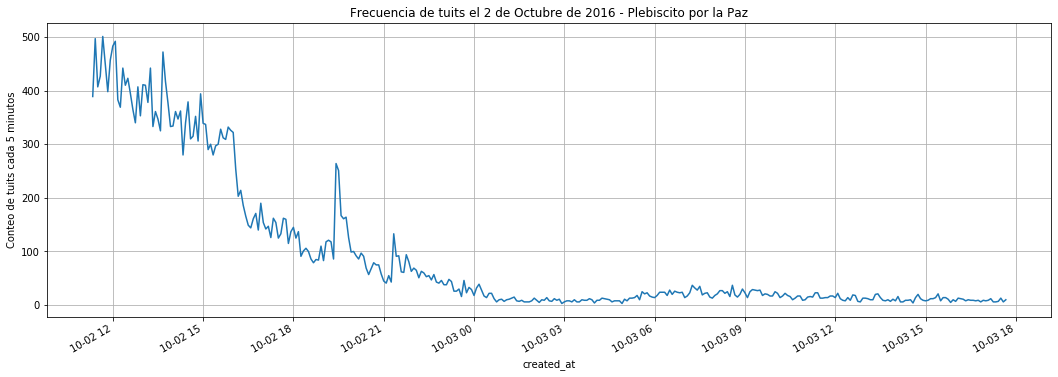

In [101]:
tweet_df_5min = data.groupby(pd.Grouper(key='created_at', freq='5Min', convention='start')).size()
tweet_df_5min.plot(figsize=(18,6))
plt.ylabel('Conteo de tuits cada 5 minutos')
plt.title('Frecuencia de tuits el 2 de Octubre de 2016 - Plebiscito por la Paz')
plt.grid(True)

Ahora hay que ver cómo están guardados los datos de los usuario emisores de tuits. Cada celda contiene un diccionario con todos los metadatos del perfil del usuario. 

In [17]:
data.user.iloc[1]

{'id': 772569692,
 'id_str': '772569692',
 'name': 'Sebas',
 'screen_name': 'soynefelibato',
 'location': 'Barcelona / Bogotá ',
 'url': 'http://scandrade25.wix.com/sebastian',
 'description': 'Un nefelibato sin remedio. \n                              Snapchat: el_delgafas.                              \nPolitólogo en formación.',
 'protected': False,
 'verified': False,
 'followers_count': 555,
 'friends_count': 731,
 'listed_count': 9,
 'favourites_count': 8175,
 'statuses_count': 17028,
 'created_at': 'Wed Aug 22 00:40:20 +0000 2012',
 'utc_offset': -14400,
 'time_zone': 'Eastern Time (US & Canada)',
 'geo_enabled': True,
 'lang': 'es',
 'contributors_enabled': False,
 'is_translator': False,
 'profile_background_color': 'C0DEED',
 'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/378800000007990896/155a3a6ec20f013cb512e427a87b8fa5.jpeg',
 'profile_background_image_url_https': 'https://pbs.twimg.com/profile_background_images/378800000007990896/155a3a6e

Lo mismo sucede con la información del tuit retuiteado. Nótese que acá los datos del usuario retuiteado están también anidados dentro de otro diccionario.

In [18]:
data.retweeted_status.iloc[1]

{'created_at': 'Sun Oct 02 16:18:22 +0000 2016',
 'id': 782615719888445440,
 'id_str': '782615719888445440',
 'text': 'En París y en Bogotá #SiALaPaz #PlebiscitoPorLaPaz (con o sin  empanadas) https://t.co/uobHuMut9d',
 'display_text_range': [0, 73],
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 2451803226,
  'id_str': '2451803226',
  'name': 'Juanita Tiene Sed',
  'screen_name': 'juanitamolano',
  'location': None,
  'url': 'http://behance.net/juanitamolanomerchan',
  'description': '¿Qué hago en este club de pre-cadáveres?',
  'protected': False,
  'verified': False,
  'followers_count': 59,
  'friends_count': 93,
  'listed_count': 1,
  'favourites_count': 638,
  'statuses_count': 797,
  'created_at': 'Fri Apr 18 18:52:58 +0000 2014

## Análisis de redes - radiografía de la conversación digital 

Preparemos el escenario para explorar la estructura de la red social/ la conversación ese día. Para ello crearemos un grafo dirigido (con dirección hacia los tuits retuiteados) en Gephi, por lo que hay que crear un conjunto especial que registre dos columnas: usuario 'fuente' y usuario 'objetivo'. Evidentemente, este conjunto se hará usando únicamente los datos del conjunto original que sean retuits.

In [19]:
#Así podemos saber que de todo el conjunto, 22606 de los tuits son retuits.

data[data.retweeted_status.notna()].shape

(22606, 33)

In [20]:
ret = data[data.retweeted_status.notna()]

In [21]:
ret.shape

(22606, 33)

Ahora voy a expandir los diccionarios para extraer los nombres de usario fuente y destino, para crear y visualizar la red de retuiteo que se dió durante esas horas.

In [22]:
# primero los datos de usuario fuente

retsource = ret.user.apply(pd.Series)

In [23]:
retsource = retsource.rename(index = str, columns = {'screen_name': 'source'})

In [24]:
list(retsource.columns)

['id',
 'id_str',
 'name',
 'source',
 'location',
 'url',
 'description',
 'protected',
 'verified',
 'followers_count',
 'friends_count',
 'listed_count',
 'favourites_count',
 'statuses_count',
 'created_at',
 'utc_offset',
 'time_zone',
 'geo_enabled',
 'lang',
 'contributors_enabled',
 'is_translator',
 'profile_background_color',
 'profile_background_image_url',
 'profile_background_image_url_https',
 'profile_background_tile',
 'profile_link_color',
 'profile_sidebar_border_color',
 'profile_sidebar_fill_color',
 'profile_text_color',
 'profile_use_background_image',
 'profile_image_url',
 'profile_image_url_https',
 'profile_banner_url',
 'default_profile',
 'default_profile_image',
 'following',
 'follow_request_sent',
 'notifications']

In [25]:
# y después los datos de usuario objetivo

rettarget = ret.retweeted_status.apply(pd.Series)

In [26]:
list(rettarget.columns)

['created_at',
 'id',
 'id_str',
 'text',
 'display_text_range',
 'source',
 'truncated',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'entities',
 'extended_entities',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'filter_level',
 'lang',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status',
 'extended_tweet']

In [27]:
# en los tuits de destino, los datos del usuario están anidados dentro de otro diccionario en 'user'

rettarget1 = rettarget.user.apply(pd.Series)

In [28]:
rettarget1 = rettarget1.rename(index = str, columns =  {'screen_name': 'target'})

In [29]:
list(rettarget1.columns)

['id',
 'id_str',
 'name',
 'target',
 'location',
 'url',
 'description',
 'protected',
 'verified',
 'followers_count',
 'friends_count',
 'listed_count',
 'favourites_count',
 'statuses_count',
 'created_at',
 'utc_offset',
 'time_zone',
 'geo_enabled',
 'lang',
 'contributors_enabled',
 'is_translator',
 'profile_background_color',
 'profile_background_image_url',
 'profile_background_image_url_https',
 'profile_background_tile',
 'profile_link_color',
 'profile_sidebar_border_color',
 'profile_sidebar_fill_color',
 'profile_text_color',
 'profile_use_background_image',
 'profile_image_url',
 'profile_image_url_https',
 'profile_banner_url',
 'default_profile',
 'default_profile_image',
 'following',
 'follow_request_sent',
 'notifications']

In [30]:
# así se ve la primera fila del conjunto objetivo

rettarget1.iloc[0]

id                                                                           2451803226
id_str                                                                       2451803226
name                                                                  Juanita Tiene Sed
target                                                                    juanitamolano
location                                                                           None
url                                             http://behance.net/juanitamolanomerchan
description                                    ¿Qué hago en este club de pre-cadáveres?
protected                                                                         False
verified                                                                          False
followers_count                                                                      59
friends_count                                                                        93
listed_count                    

In [31]:
# concatenamos los conjuntos para tener un solo df de retuits 

retdf = pd.concat([retsource, rettarget1], axis = 1)

In [32]:
retdf.shape

(22606, 76)

In [33]:
# así se ve la primera fila del conjunto de retuits completo


list(retdf.iloc[0])

[772569692,
 '772569692',
 'Sebas',
 'soynefelibato',
 'Barcelona / Bogotá ',
 'http://scandrade25.wix.com/sebastian',
 'Un nefelibato sin remedio. \n                              Snapchat: el_delgafas.                              \nPolitólogo en formación.',
 False,
 False,
 555,
 731,
 9,
 8175,
 17028,
 'Wed Aug 22 00:40:20 +0000 2012',
 -14400.0,
 'Eastern Time (US & Canada)',
 True,
 'es',
 False,
 False,
 'C0DEED',
 'http://pbs.twimg.com/profile_background_images/378800000007990896/155a3a6ec20f013cb512e427a87b8fa5.jpeg',
 'https://pbs.twimg.com/profile_background_images/378800000007990896/155a3a6ec20f013cb512e427a87b8fa5.jpeg',
 True,
 'F5ABB5',
 '000000',
 'DDEEF6',
 '333333',
 True,
 'http://pbs.twimg.com/profile_images/768451577401053184/pYf--a12_normal.jpg',
 'https://pbs.twimg.com/profile_images/768451577401053184/pYf--a12_normal.jpg',
 'https://pbs.twimg.com/profile_banners/772569692/1472569093',
 False,
 False,
 None,
 None,
 None,
 2451803226,
 '2451803226',
 'Juanita Ti

In [34]:
list(retdf.columns)

['id',
 'id_str',
 'name',
 'source',
 'location',
 'url',
 'description',
 'protected',
 'verified',
 'followers_count',
 'friends_count',
 'listed_count',
 'favourites_count',
 'statuses_count',
 'created_at',
 'utc_offset',
 'time_zone',
 'geo_enabled',
 'lang',
 'contributors_enabled',
 'is_translator',
 'profile_background_color',
 'profile_background_image_url',
 'profile_background_image_url_https',
 'profile_background_tile',
 'profile_link_color',
 'profile_sidebar_border_color',
 'profile_sidebar_fill_color',
 'profile_text_color',
 'profile_use_background_image',
 'profile_image_url',
 'profile_image_url_https',
 'profile_banner_url',
 'default_profile',
 'default_profile_image',
 'following',
 'follow_request_sent',
 'notifications',
 'id',
 'id_str',
 'name',
 'target',
 'location',
 'url',
 'description',
 'protected',
 'verified',
 'followers_count',
 'friends_count',
 'listed_count',
 'favourites_count',
 'statuses_count',
 'created_at',
 'utc_offset',
 'time_zone',
 'g

In [35]:
# ahora generamos el conjunto especial que va a ser utilizado en Gephi 

graph = retdf[['source', 'target']]

In [36]:
graph

source           target
1        soynefelibato    juanitamolano
6        isabelporto30  repnicoguerrero
8           Marion1871           F_PS86
10             eidanru      SCarrascalP
14            Bella623    AntanasMockus
...                ...              ...
33758        anijara18          saudosa
33759  mcristinamont87       RosyCardea
33761      PauFresneda    prada_rodolfo
33762     gonzalillo10      natiibedoya
33763        parditosv     luisedocalle

[22606 rows x 2 columns]

Ya está listo este segundo conjunto para ser exportado a .csv para ser analizado en Gephi, lo que me va a pemritir hacer una radiografía de la red conversacional digital que se tejió ese día, con lo que voy a poder identificar claramente sub comunidades alrededor de la conversación.

In [184]:
# y lo exportamos como csv

graph.to_csv('grafo_plebiscito.csv', index = False)

Y ya tenemos nuestro grafo, cuyos nodos tienen un tamaño proporcional al grado de entrada que tienen, esto es, del número de retuits que recibieron. Gracias a esto podemos ver tres grandes comunidades calculadas por vía de la métrica de modularidad en Gephi: la comunidad roja, representando un 355 de los nodos en la red, enmarca a la UP, a Gustavo Bolívas y a Martín Santos, entre otros; la comunidad azul, con un 17% de los nodos, representa a la ala uribista de la ocnversación, con Pacho Santos y Nati Bedoya como figuras centrales; y la comunidad verde, representando un 11% de los nodos en el grafo, cuenta con el nodo más central y de mayor tamaño por ser el tuit más retuiteado, el de Claudia López. 

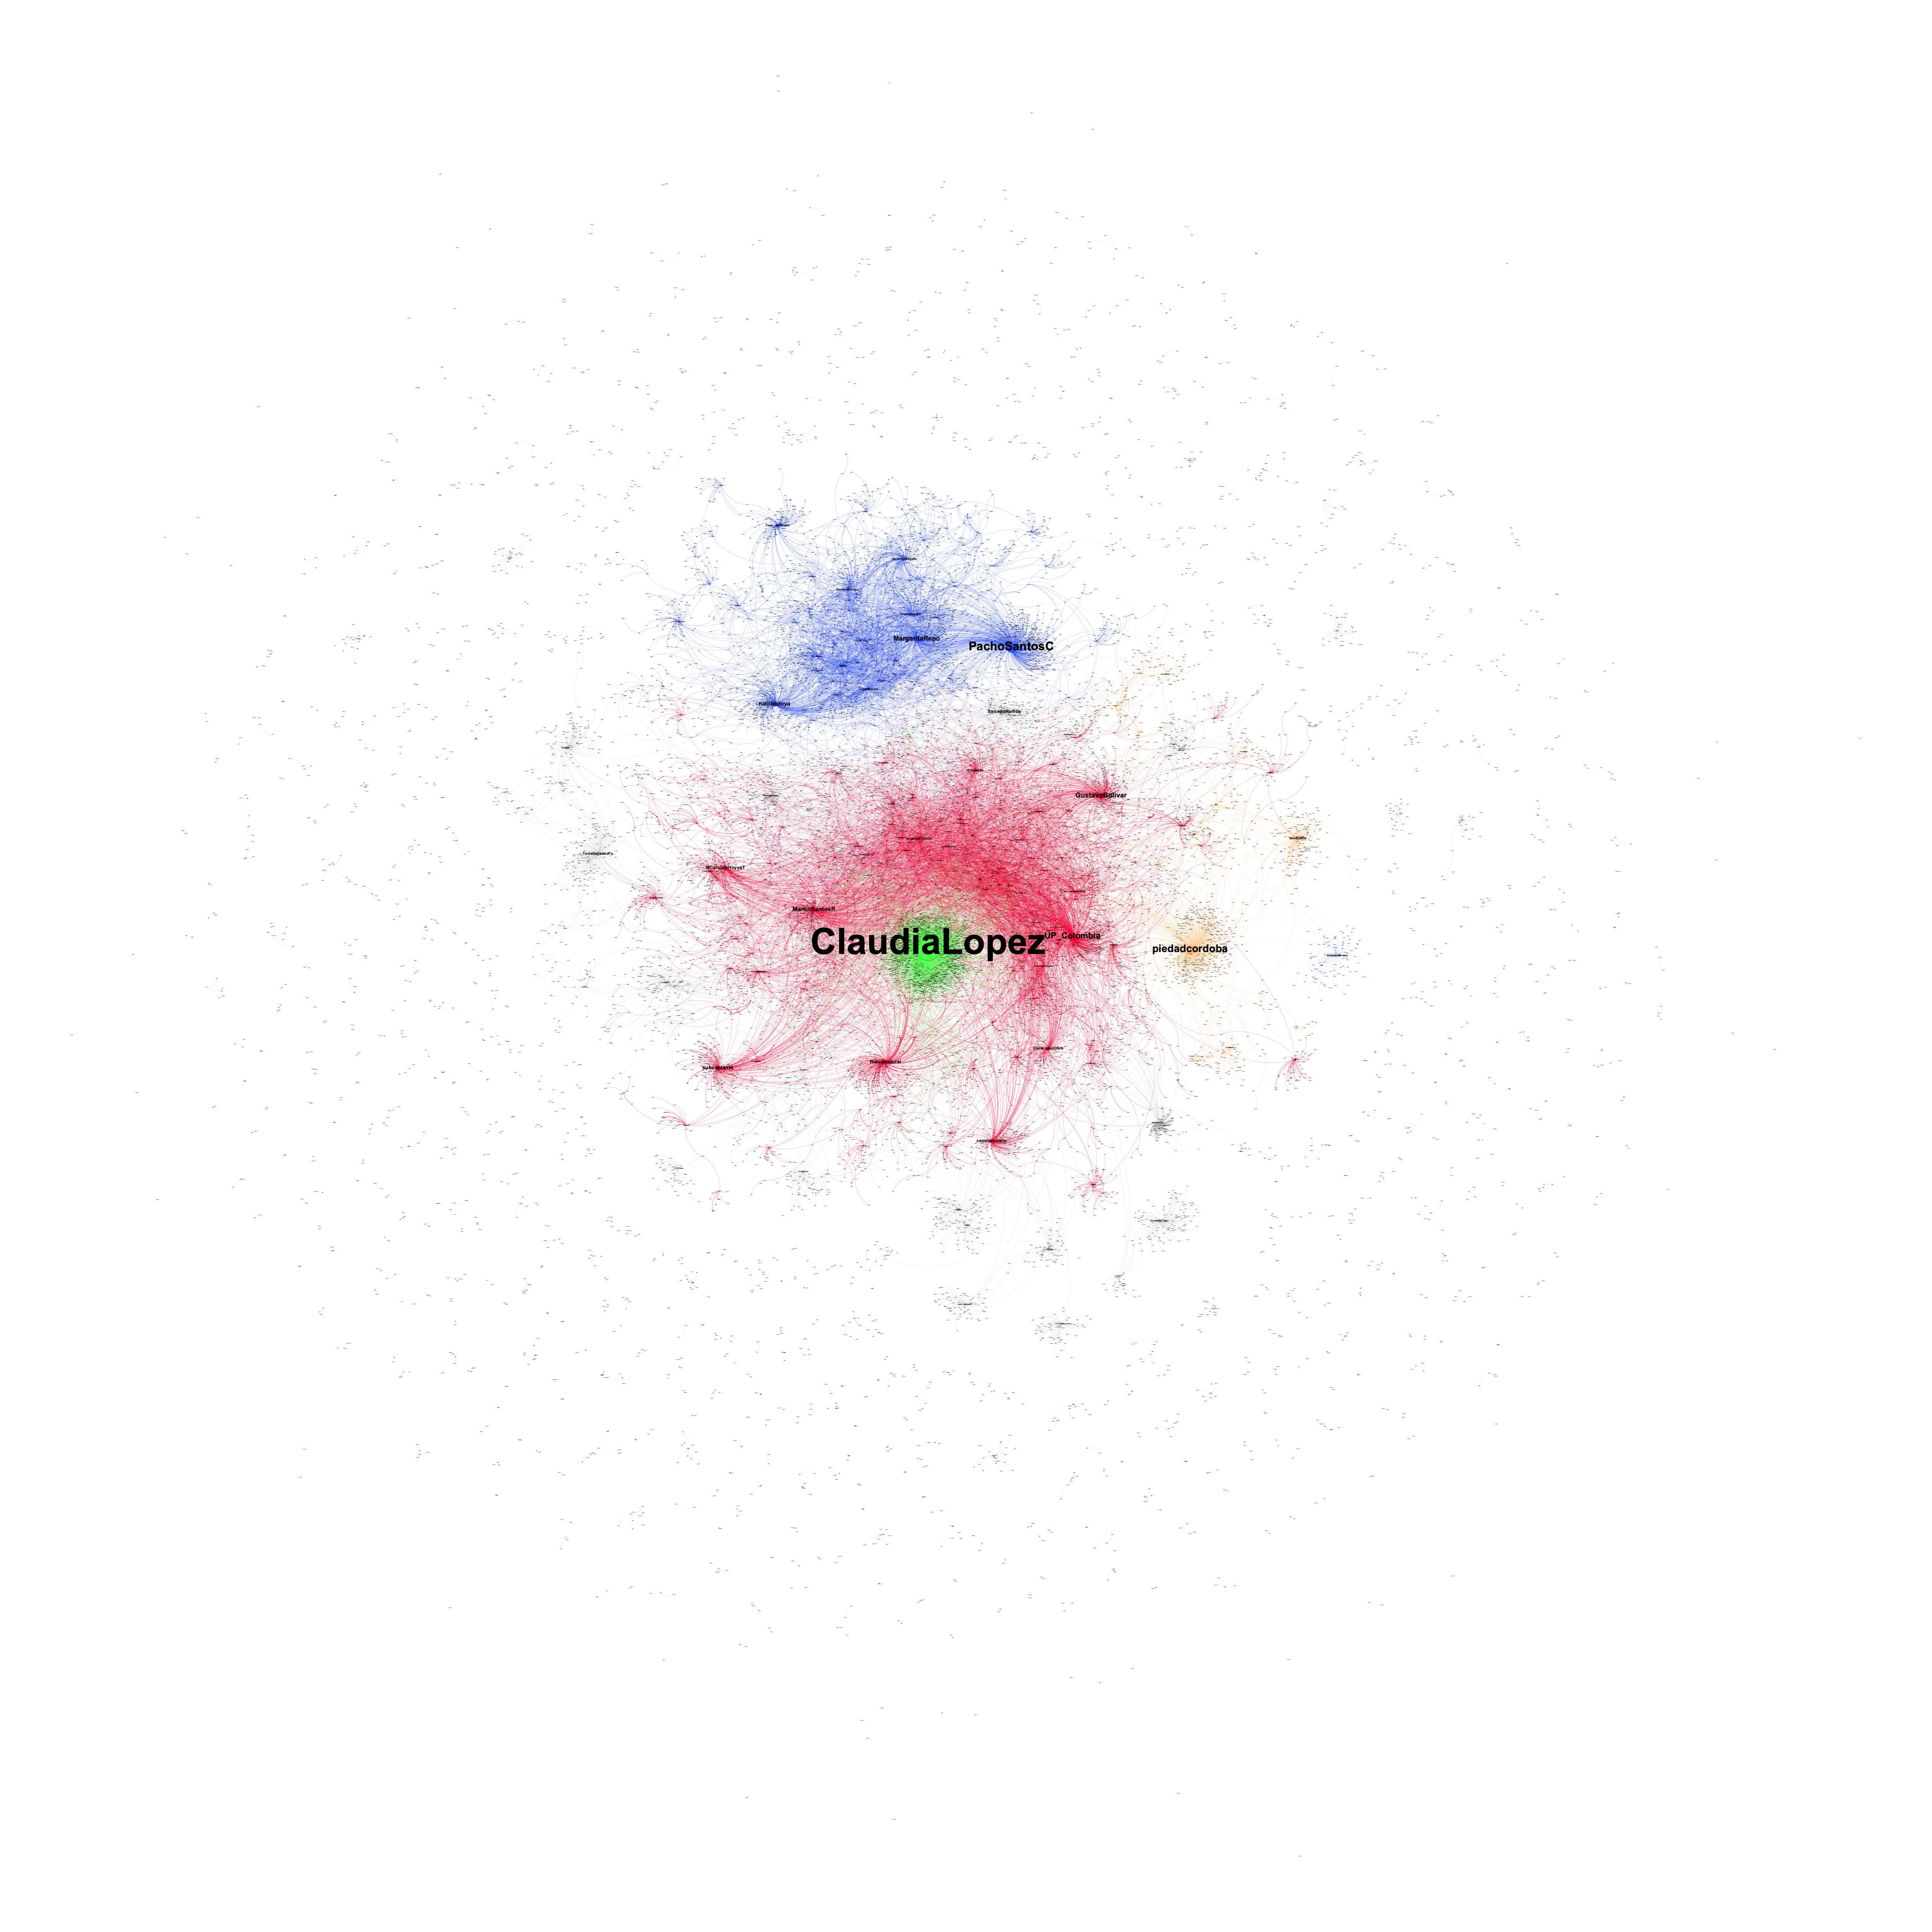

## Actividad inorgánica - posibles casos de bots o semibots

Ahora intentaremos detección de actividad inorgánica. Para ello, debo expandir el diccionario contenido en 'user' con el fin de extraer el screen_name de cada actividad registrada.
Nota: voy a asumir que no hay hilos.

In [42]:
usertotal = data.user.apply(pd.Series)
usertotal.shape

(33762, 38)

In [130]:
# concatenar con el set completo que contiene el timestamp de creación

dftotal = pd.concat([data, usertotal], axis = 1)
dftotal.shape

(33762, 71)

In [47]:
# Eliminamos todos los perfiles verificados por Twitter, porque no por definición no pueden ser bots

dftotal = dftotal[dftotal.verified == False]
dftotal.shape

(33592, 71)

In [54]:
list(dftotal.columns)

['created_at',
 'id',
 'id_str',
 'text',
 'source',
 'truncated',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'entities',
 'favorited',
 'retweeted',
 'filter_level',
 'lang',
 'timestamp_ms',
 'retweeted_status',
 'extended_entities',
 'possibly_sensitive',
 'display_text_range',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status',
 'extended_tweet',
 'limit',
 'id',
 'id_str',
 'name',
 'screen_name',
 'location',
 'url',
 'description',
 'protected',
 'verified',
 'followers_count',
 'friends_count',
 'listed_count',
 'favourites_count',
 'statuses_count',
 'created_at',
 'utc_offset',
 'time_zone',
 'geo_enabled',
 'lang',
 'contributors_enabled',
 'is_translator',
 'profile_background_color',
 'profile_background_image_url',
 'profile_background_image_url_https',
 'profile_backgr

In [66]:
# creamos un conjunto especial que contenga solo nombre de usuario y timestamp

botdet = dftotal[['screen_name', 'created_at']]
botdet.head(10)

screen_name                created_at                      created_at
0    dan_chaparrog 2016-10-02 11:21:03-05:00  Wed Aug 18 22:07:58 +0000 2010
1    soynefelibato 2016-10-02 11:21:05-05:00  Wed Aug 22 00:40:20 +0000 2012
2       Kenmadnees 2016-10-02 11:21:05-05:00  Sun May 06 21:19:50 +0000 2012
3          miyakiv 2016-10-02 11:21:06-05:00  Fri Jan 15 20:51:00 +0000 2010
4        _SubVerso 2016-10-02 11:21:06-05:00  Thu Apr 21 18:40:23 +0000 2011
5      Andresc1927 2016-10-02 11:21:07-05:00  Mon May 05 02:54:14 +0000 2014
6    isabelporto30 2016-10-02 11:21:08-05:00  Mon Aug 29 15:16:08 +0000 2016
7  carlosmrenteria 2016-10-02 11:21:08-05:00  Tue Jan 22 16:06:48 +0000 2008
8       Marion1871 2016-10-02 11:21:08-05:00  Sat Jan 29 20:01:45 +0000 2011
9  JulianCarvajal_ 2016-10-02 11:21:09-05:00  Sun Mar 18 18:23:38 +0000 2012

In [67]:
# dado que hay columnas de created_at repetidas en la concatenación, eliminamos la última

botdet = botdet.iloc[:, :-1]
botdet.head(10)

screen_name                created_at
0    dan_chaparrog 2016-10-02 11:21:03-05:00
1    soynefelibato 2016-10-02 11:21:05-05:00
2       Kenmadnees 2016-10-02 11:21:05-05:00
3          miyakiv 2016-10-02 11:21:06-05:00
4        _SubVerso 2016-10-02 11:21:06-05:00
5      Andresc1927 2016-10-02 11:21:07-05:00
6    isabelporto30 2016-10-02 11:21:08-05:00
7  carlosmrenteria 2016-10-02 11:21:08-05:00
8       Marion1871 2016-10-02 11:21:08-05:00
9  JulianCarvajal_ 2016-10-02 11:21:09-05:00

In [155]:
# creamos la función que va a detectra actividad inorgánica detectando intervalos de actividad menores de 1s

def tempo(df):
    author = df.screen_name
    dt = pd.to_datetime(df.created_at, errors='coerce').fillna(0).sort_values()
    dt_diff = dt.diff().astype('timedelta64[s]')
    diff_nozero = dt_diff.to_numpy().nonzero()[0]
    n_zero = len(dt_diff) - len(diff_nozero)
    if n_zero > 1:
        return 1
    return 0

In [69]:
# agrupamos por nombre de usuario

botdet_gby = botdet.groupby('screen_name')

In [95]:
# y corremos la función

bots = botdet_gby.apply(tempo)

In [102]:
bots

screen_name
00002032           0
000120o            0
0105Estela         0
0108laura          0
028368c77a4d427    0
                  ..
zuluagapardo       0
zuly_campero       0
zulyx0             0
zunigaedu          0
zurdotercero       0
Length: 20833, dtype: int64

In [111]:
bots1 = bots[bots == 1]

In [118]:
# estos 10 usuarios presentan una actividad a intervalos sospechosamente cortos < 1 segundo

bots1

screen_name
Cayo_Betancourt    1
DrKPresente        1
Ernesto1931        1
MariaFer07h        1
StevenArce20       1
Tweetigniter       1
eguinperez         1
lejandroquiroga    1
sergycontreras     1
dtype: int64

In [137]:
# ahora revisemoslos en el marco del conjunto completo

fulltext_bots = dftotal[dftotal.screen_name.isin(bots1.index)]

In [150]:
# y podemos observar el ritmo de actividad 

activity_rate = fulltext_bots.created_at
activity_rate.shape

(180, 2)

In [148]:
activity_rate = activity_rate.iloc[:,:-1]
activity_rate.head(20)

created_at
45   2016-10-02 11:21:26-05:00
46   2016-10-02 11:21:27-05:00
47   2016-10-02 11:21:27-05:00
48   2016-10-02 11:21:27-05:00
200  2016-10-02 11:23:10-05:00
206  2016-10-02 11:23:13-05:00
212  2016-10-02 11:23:14-05:00
1348 2016-10-02 11:35:39-05:00
1350 2016-10-02 11:35:40-05:00
1351 2016-10-02 11:35:41-05:00
1352 2016-10-02 11:35:41-05:00
1355 2016-10-02 11:35:42-05:00
1356 2016-10-02 11:35:42-05:00
1357 2016-10-02 11:35:42-05:00
2567 2016-10-02 11:48:56-05:00
2568 2016-10-02 11:48:56-05:00
2569 2016-10-02 11:48:57-05:00
2570 2016-10-02 11:48:57-05:00
2572 2016-10-02 11:48:57-05:00
2692 2016-10-02 11:50:12-05:00

In [160]:
# y aquí una lista de los tuits retuiteados - resalta la presencia general del #HoyVotoSI.
# varios parecen ser relativos a noticias o eventos internacionales.

list(fulltext_bots.text)

['#HoyVotoSI Revelado: El Pentágono pagó sumas enormes por vídeos falsos sobre Al Qaeda https://t.co/PwRBt4D3XN SIGUE @Larissacostas',
 '#HoyVotoSI La abuela más sexi del mundo: una modelo de 60 años desafía las pasarelas con... https://t.co/Y8aZq93vyj SIGUE @Larissacostas',
 '#HoyVotoSI Video desde la cabina del piloto: un MiG-31 surca la estratosfera en el Lejan... https://t.co/lRpW1jBcWm SIGUE @Larissacostas',
 '#HoyVotoSI Algo salió mal cuando estos terroristas preparaban un atentado en Irak https://t.co/rb2KQMWW8O SIGUE @Larissacostas',
 '#HoyVotoSI  De la Calle: "El No ya lo ensayamos por 52 años en Colombia" https://t.co/hBI50Da9oW SIGUE… https://t.co/AOZOAQpAaz',
 '#HoyVotoSI  JVR: Nunca Venezuela había tenido una oposición tan antinacional https://t.co/3t0diENvVr SIGUE A .@dcabellor',
 '#HoyVotoSI   Mentiras y verdades de la paz en Colombia (+ infografías) https://t.co/gnVX1XoANL SIGUE @Larissacostas https://t.co/PTuRNDZ8jS',
 'RT @godie87: #VotoSíSinSerSantista nada mejor que

## Fin - Siguientes pasos

Las limitaciones de tiempo no permiten que siga explorando este conjunto como me gustaría. Por ejemplo, lo siguiente que haría sería correr modelos de ML y en particular de NLP (Natural Language Processing) para ejecutar minado de opinión y análisis de sentimiento sobre el conjunto, para luego, y dependiendo del sentimiento negativo, neutro o positivo de cada una de las comunidades identificadas en el ejercicio de análisis de redes, correr un modelo de Latent Dirichlect Allocation (LDA). Los modelos de LDA permiten inferir estadísticamente los temas tratados en un cuerpo amplio de textos, lo que los hace una herramienta crucial para comprender de qué trata un volúmen alto de textos.

Un ejemplo de lo anterior y que hice hace algunos meses se puede ver en https://towardsdatascience.com/opinion-mining-in-twitter-using-vader-and-gensims-latent-dirichlect-allocation-lda-a834c2a936, aunque en esa ocasión corrí los modelos de NLP y LDA sobre textos en inglés, para los que los modelos, en particular VADER, están entrenados específicamente con tuits en inglés. 

Finalmente, y para referencia, en este otro artículo https://towardsdatascience.com/predicting-football-players-commercial-value-with-xgboost-d0670d9e9d2e explico un ejercicio de predicción usando el algoritmo de ML XGBoost.